<a href="https://colab.research.google.com/github/romenlaw/NaiveNeuralNetwork/blob/main/tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git

In [1]:
!git config --global user.name "romenlaw"
!git config --global user.email "e"
TOKEN='github_pat_'
!git clone https://$TOKEN@github.com/romenlaw/NaiveNeuralNetwork

Cloning into 'NaiveNeuralNetwork'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 122 (delta 55), reused 33 (delta 9), pack-reused 0
Receiving objects: 100% (122/122), 61.05 KiB | 440.00 KiB/s, done.
Resolving deltas: 100% (55/55), done.


In [2]:
%cd /content/NaiveNeuralNetwork

/content/NaiveNeuralNetwork


In [3]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [84]:
!git add nnn.py visualiser.py __init__.py
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   nnn.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/



In [114]:
!git reset

Unstaged changes after reset:
M	__pycache__/nnn.cpython-310.pyc
M	nnn.py
M	visualiser.py


In [85]:
!git commit -m "fix backward(), add ReLU and other magic methods"

[main e0d5759] fix backward(), add ReLU and other magic methods
 1 file changed, 39 insertions(+), 6 deletions(-)


In [86]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 709 bytes | 709.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/romenlaw/NaiveNeuralNetwork
   efe2470..e0d5759  main -> main


# Housekeeping

In [4]:
!pwd

/content/NaiveNeuralNetwork


In [5]:
import sys
sys.path.append('/content/NaiveNeuralNetwork')

%load_ext autoreload
%autoreload 2

In [73]:
from nnn import Scalar
from visualiser import *


# Visualise

In [81]:
a=Scalar(2., label='a')
b=Scalar(-3, label='b')
c=Scalar(10, label='c')
e=a*b; e.label='e'
d=e+c+b; d.label='d'
f=d*e; f.label='f'
L=(-f).relu(); L.label='L'


In [8]:
import graphviz
from visualiser import *

In [82]:
L.backward()

[L: 6.0, : 6.0, : -1, f: -6.0, d: 1.0, : 4.0, c: 10, e: -6.0, b: -3, a: 2.0]


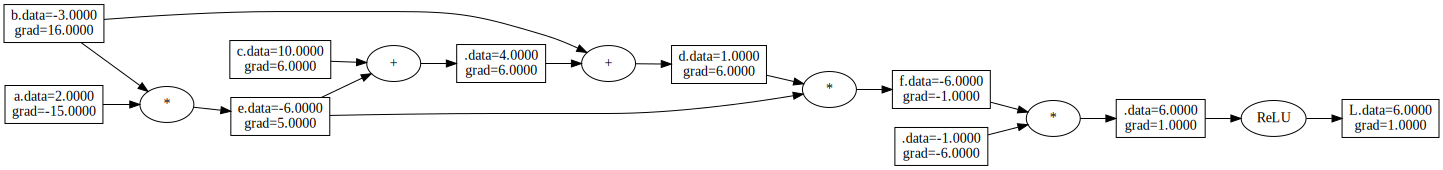

In [83]:
visualise(L)

# Gradient

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 3*x**2 - 4 * x + 5

In [3]:
f(2.0)

9.0

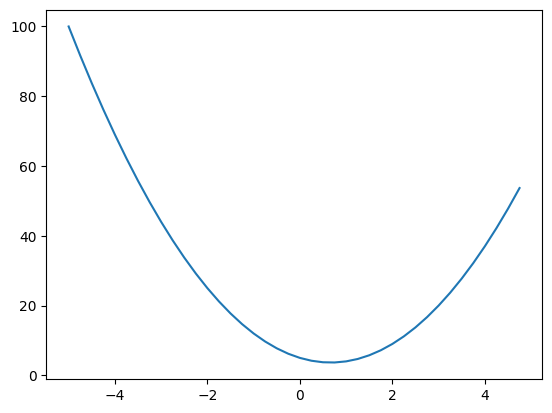

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

The definition of [derivitive](https://en.wikipedia.org/wiki/Derivative) as a limit is that
$$L=\lim_{h \to 0} \dfrac{f_{(a+h)} - f_{(h)}} {h}$$

In [8]:
h=1e-7
a=2.0
(f(a+h)-f(a))/h

8.000000288888032

Numerically check against the Scalar backward() results.

In [69]:
def lol():
  a=Scalar(2., label='a')
  b=Scalar(-3, label='b')
  c=Scalar(10, label='c')
  e=a*b; e.label='e'
  d=e+c+b; d.label='d'
  f=d*e; f.label='f'
  L1=f.data


  h=1e-4
  a=Scalar(2., label='a')
  b=Scalar(-3, label='b')+h
  c=Scalar(10, label='c')
  e=a*b; e.label='e'
  d=e+c+b; d.label='d'
  f=d*e; f.label='f'
  L2=f.data

  print((L2-L1)/h)

lol()

-15.999400000037411
